In [2]:
# This is my DSC 607 - Data Mining final project. It is an attempt to predict who is a "big wine spender"
# for marketing purposes based on various socioeconomic factors using K-nearest neighbors. 
# You can view the accompanying presentation at https://youtu.be/kbKxhUVsw0E

# Import needed packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
# Preview data for exploratory data analysis

dataset = pd.read_csv(r'C:\Users\jejohnson\Documents\Utica\DSC 607\Week 8\data_class_with_outcome.csv')
dataset.head()

,ID,Kidhome,Teenhome,before_1945,boomer,genx,millennial,low_income,medium_income,high_income,big_wine_spender
0,5524,0,0,0,1,0,0,0,1,0,1
1,2174,1,1,0,1,0,0,0,1,0,0
2,4141,0,0,0,0,1,0,0,0,1,0
3,6182,1,0,0,0,0,1,1,0,0,0
4,5324,1,0,0,0,0,1,0,1,0,0


In [86]:
data

,ID,Kidhome,Teenhome,before_1945,boomer,genx,millennial,low_income,medium_income,high_income,big_wine_spender
0,5524,0,0,0,1,0,0,0,1,0,1
1,2174,1,1,0,1,0,0,0,1,0,0
2,4141,0,0,0,0,1,0,0,0,1,0
3,6182,1,0,0,0,0,1,1,0,0,0
4,5324,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,0,1,0,0,1,0,0,1,0,1
2212,4001,2,1,0,1,0,0,0,1,0,0
2213,7270,0,0,0,0,0,1,0,1,0,1
2214,8235,0,1,0,1,0,0,0,1,0,0


In [12]:
# Set big_wine_spender as dependent variable

X = dataset.iloc[:, 1:9].values
y = dataset.iloc[:, 10].values

In [13]:
# Split data into training (80%) and testing (20%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=28)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=28)

In [17]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[295  34]
 [ 57  58]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       329
           1       0.63      0.50      0.56       115

    accuracy                           0.80       444
   macro avg       0.73      0.70      0.71       444
weighted avg       0.78      0.80      0.79       444



In [36]:
error = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

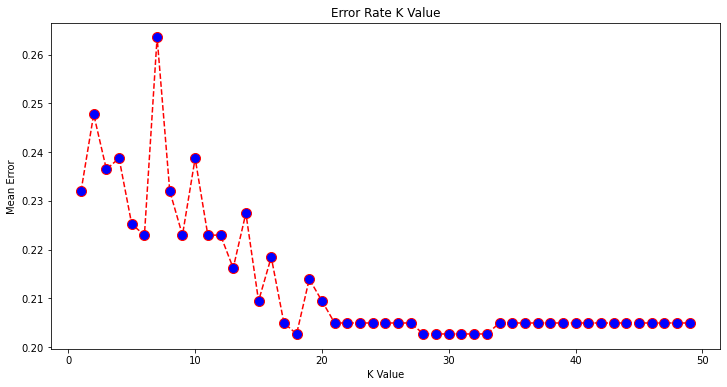

In [37]:
# Elbow method to determine optimal value of k

plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [26]:
# Optimal number for k is 28
classifier = KNeighborsClassifier(n_neighbors=28)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=28)

In [28]:
y_pred = classifier.predict(X_test)

In [32]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[296  33]
 [ 57  58]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       329
           1       0.64      0.50      0.56       115

    accuracy                           0.80       444
   macro avg       0.74      0.70      0.72       444
weighted avg       0.79      0.80      0.79       444



Feature: 0, Score: 0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000


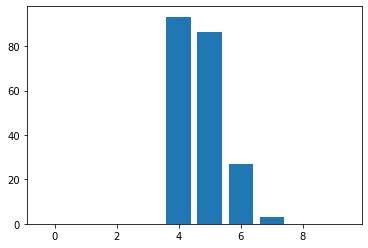

In [49]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=4, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [55]:
import seaborn as sns
from sklearn.cluster import KMeans

In [61]:
dataset_mc = pd.read_csv(r'C:\Users\jejohnson\Documents\Utica\DSC 607\datasets\customer personality\marketing_campaign.csv', sep='\t')

dataset_mc

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [70]:
# Drop rows with birth years before 1940 since they may be inaccurate

indexNames = dataset_mc[ dataset_mc['Year_Birth'] < 1940 ].index
dataset_mc.drop(indexNames , inplace=True)

dataset_mc['Year_Birth'].min()

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(birth_year, wine_spending)
plt.ylabel('Wine Spending')
plt.xlabel('Birth Year')

1940

Text(0.5, 0, 'Birth Year')

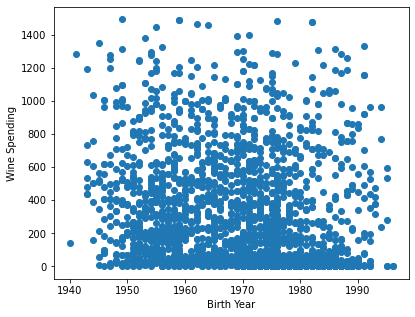

In [73]:
birth_year=dataset_mc['Year_Birth']
wine_spending=dataset_mc['MntWines']

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(birth_year, wine_spending)
plt.ylabel('Wine Spending')
plt.xlabel('Birth Year')

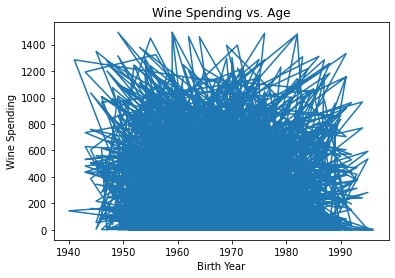

In [78]:
plt.plot(birth_year,wine_spending)
plt.title('Wine Spending vs. Age')
plt.xlabel('Birth Year')
plt.ylabel('Wine Spending')
plt.show()

In [105]:
y_pred_df = pd.DataFrame(y_pred, columns=['knn_labels'])

new_df = dataset.drop(columns=['big_wine_spender', 'ID'])
new_df.append(y_pred_df)

,Kidhome,Teenhome,before_1945,boomer,genx,millennial,low_income,medium_income,high_income,knn_labels
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [104]:
import seaborn as sns

ax = sns.scatterplot(data=dataset_mc, x=birth_year, y=wine_spending, hue='knn_labels')

ax.set(xlabel='Birth Year', ylabel='Wine Spending')

ax.set_title('Wine Spending vs. Birth Year')

ValueError: Could not interpret value `knn_labels` for parameter `hue`